# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
X = pd.read_csv('X_file.csv').values
y = pd.read_csv('y_file.csv')['0'].values
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size = 0.2, random_state = 1)



b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

<AxesSubplot:>

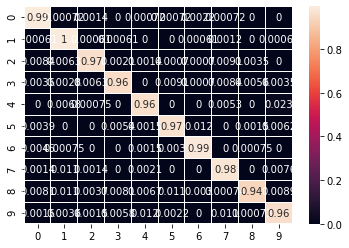

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, np.newaxis]
sns.heatmap(cmn, annot = True, linewidths = 0.01)



In [ ]:
The model performed very well. 8 was the most confused class with an accuracy of 94%.

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

Text(0, 0.5, 'Accuracy')

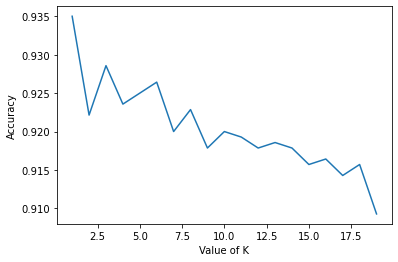

In [8]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(
                                X_test, y_test, test_size=0.2, random_state=1)
Range_k = range(1,20)
scores_list = []
for k in range(1, 20):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy") 


In [ ]:
k = 1 is the most optimal value according to the graph.

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

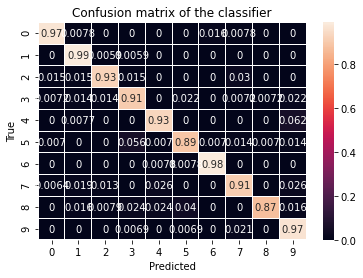

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, linewidths = 0.01)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
All predicted classes have an accuracy of 90% or higher except 5 and 8 which have lower accuracies of 89 and 87 % respectively.

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

Text(0, 0.5, 'the mean cv Accuracy')

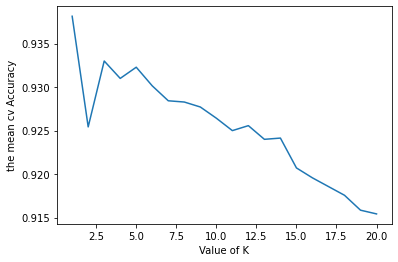

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.1, random_state=1)
Range_k = range(1,21)
cv_scores_list = []
for k in Range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = np.mean(cross_val_score(classifier, X_test, y_test, cv=10))
    cv_scores_list.append(cv_scores)
plt.plot(Range_k,cv_scores_list)
plt.xlabel("Value of K")
plt.ylabel("the mean cv Accuracy") 

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

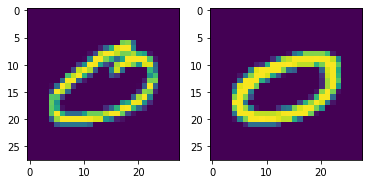

In [12]:
from random import randint
from random import seed
import math
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

seed(1)
ran_num = randint(0, X.shape[0])
image = X[ran_num]
min_distance = 100000
index = 0
for x in range(X.shape[0]):
    if x != ran_num:
        dist = euclidean_distance(image,X[x])
        if dist<min_distance:
            min_distance = dist
            index = x
reshaped_image = image.reshape(28,28)
reshaped_neighbor = X[index].reshape(28,28)
fig,(ax1, ax2) = plt.subplots(1,2)
ax1.imshow(reshaped_image)
ax2.imshow(reshaped_neighbor)

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed. **- 7 points**

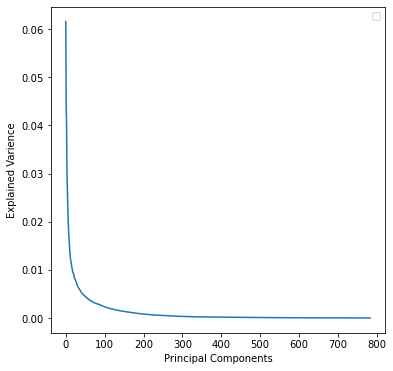

Text(0, 0.5, 'the mean cv Accuracy')

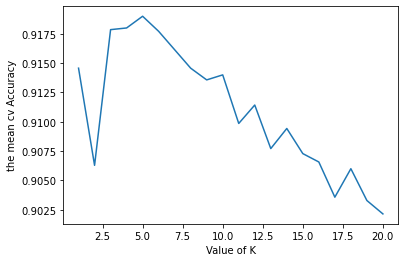

In [13]:
from sklearn.pipeline import make_pipeline

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
seed(1)
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size = 0.1, random_state = 1)
scalar = StandardScaler()
df_scaled = scalar.fit_transform(X_test)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)
pd.DataFrame(pca.explained_variance_ratio_).plot(figsize = (6, 6))
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.show()

num_of_dimansion = 100
Range_k = range(1,21)
cv_scores_list = []
for k in Range_k:
    classifier = make_pipeline(PCA(n_components = num_of_dimansion), KNeighborsClassifier(n_neighbors = k))
    cv_scores = np.mean(cross_val_score(classifier, df_scaled, y_test, cv = 10))
    cv_scores_list.append(cv_scores)
plt.plot(Range_k,cv_scores_list)
plt.xlabel("Value of K")
plt.ylabel("the mean cv Accuracy") 

In [ ]:
I chose 100 as my dimension since most of the variance is captured by the first 100 principal components 

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [15]:
df = pd.read_csv('train.csv')
df, test = train_test_split(df, test_size=0.2)
def replace_with_mean(df):
    mean = df.Age.mean()
    return np.round(df['Age'].fillna(mean),1)
df['Age'] = replace_with_mean(df)
test['Age'] = replace_with_mean(test)
df.isnull().sum()
test.isnull().sum()
df = df.drop(columns = ['Cabin'])
test = test.drop(columns = ['Cabin'])
df = df.dropna()
test = test.dropna()

b) Informed by homework 1, we will add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features. **-15 points**

c) Some features are now redundant or not useful. Please remove them from the dataset.

Then, train a Decision Tree Classifier using all numerical features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **-10 points**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


d) Plot the decision tree. Briefly explains how it works. **-5 points**

In [ ]:
from sklearn.tree import plot_tree


e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 5 points**

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

g) Reduce the dimension of the dataset to 4 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 5 points**

# Bonus (20 Points)

**No library functions besides `numpy` are allowed for this bonus. You must use the decision tree you implemented in lab 6**

The Random Forest algorithm is an extension to decision trees. It makes use of multiple decision trees to make a decsion.

Ensemble modeling is a method of constructing a strong model using multiple weak models. Random Forests algorithm is one such ensemble model.

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k' (k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision.

In this task, you will implement the random forests algorithm and apply it on the 'Titanic' dataset.

a) construct your model (5 points)

In [22]:
class Random_Forest():

    def __init__(self, num_trees, max_depth):
        self.max_depth = max_depth
        self.decision_trees = [SimpleDecisionTree(max_depth = max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(predictions):
        predictions = pd.DataFrame(predictions)
        return predictions.mode(axis = 1)[0]
    
    def predict(self, X_test, y_test):
        X_predictions = {}
        for i in range(len(self.fit_tree_list)):
            column_name = "tree_{}".format(i)
            predictions = self.fit_tree_list[i].predict(X_test)
            X_predictions[column_name] = predictions
        return self._majority(X_predictions)



b) Hyperparameter tuning, and model evaluation for random forests. (10 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] (you will need to implement the entropy criteria)


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

c) calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
